# ML CT3 Mini Project

### DATA_SET:

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.

* date
* average_temperature
*  minimum_temperature
* maximum_temperature
* precipitation
* weekend
* beer_consumption (target attribute)


In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor

### 1. Data Understanding (5 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK) 

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark) 

d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks) 

**a. Read the dataset. What are the number of rows and cols & types of variables (continuous, categorical etc.)? (1 MARK)**

In [2]:
df=pd.read_csv(r'C:\Users\priya\SRM PYTHON\IS\MP3\dataset.csv')
df.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.000000,25.461000
1,2015-01-02,"27,02","24,5","33,5",0,0.000000,28.972000
2,2015-01-03,"24,82","22,4","29,9",0,1.000000,30.814000
3,2015-01-04,"23,98","21,5","28,6","1,2",1.000000,29.799000
4,2015-01-05,"23,82",21,"28,3",0,0.000000,28.900000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [4]:
df.shape

(941, 7)

### INFERENCE: <font color='green'> We have 941 rows and 7 columns out of which 5 columns are categorical and 2 are numerical columns.</font>

**b. Calculate five-point summary for numerical variables (1 MARK)**

In [5]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [6]:
df['Final de Semana'].value_counts()

0.000000    261
1.000000    104
Name: Final de Semana, dtype: int64

### INFERENCE: <font color='green'> Column 'Final de Semana' has only 0 and 1 as values. We can convert it to categorical  but we have retained it as numerical for our analysis. </font>

### NOTE: <font color='Blue'> Few categorical columns will be converted to numerical values and their 5 point summary is found in later part of code .</font>

**c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)**

In [7]:
df.describe(include='object')

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm)
count,365,365,365,365,365
unique,365,277,110,151,93
top,2015-09-13,"22,76","18,2",28,0
freq,1,5,11,7,218


In [8]:
data_prep=pd.DataFrame({'Precipitation freq': df['Precipitacao (mm)'].value_counts(),
                       'Precipitation in %': df['Precipitacao (mm)'].value_counts()/365 *100})
data_prep=data_prep.reset_index().rename(columns={'index':'Precipitacao'})

data_med=pd.DataFrame({'Temp_Media freq': df['Temperatura Media (C)'].value_counts(),
                       'Temp_Media in %': df['Temperatura Media (C)'].value_counts()/365 *100})
data_med=data_med.reset_index().rename(columns={'index':'Temperatura Media'})

data_max=pd.DataFrame({'Temp_Maxima freq': df['Temperatura Maxima (C)'].value_counts(),
                       'Temp_Maxima in %': df['Temperatura Maxima (C)'].value_counts()/365 *100})
data_max=data_max.reset_index().rename(columns={'index':'Temperatura Maxima'})

data_min=pd.DataFrame({'Temp_Minima freq': df['Temperatura Minima (C)'].value_counts(),
                       'Temp_Minima in %': df['Temperatura Minima (C)'].value_counts()/365 *100})
data_min=data_min.reset_index().rename(columns={'index':'Temperatura Minima'})

data_min=pd.DataFrame({'Temp_Minima freq': df['Temperatura Minima (C)'].value_counts(),
                       'Temp_Minima in %': df['Temperatura Minima (C)'].value_counts()/365 *100})
data_min=data_min.reset_index().rename(columns={'index':'Temperatura Minima'})

In [9]:
pd.concat([data_prep,data_med,data_max,data_min],axis=1).head(5)

,Precipitacao,Precipitation freq,Precipitation in %,Temperatura Media,Temp_Media freq,Temp_Media in %,Temperatura Maxima,Temp_Maxima freq,Temp_Maxima in %,Temperatura Minima,Temp_Minima freq,Temp_Minima in %
0,0,218.000000,59.726027,"22,76",5,1.369863,28,7.000000,1.917808,"18,2",11.000000,3.013699
1,"0,1",6.000000,1.643836,24,5,1.369863,"27,4",7.000000,1.917808,"19,3",11.000000,3.013699
2,"2,4",5.000000,1.369863,"22,52",4,1.095890,"27,2",7.000000,1.917808,"19,6",9.000000,2.465753
3,"0,6",4.000000,1.095890,"23,12",4,1.095890,29,6.000000,1.643836,"19,7",8.000000,2.191781
4,"0,2",4.000000,1.095890,"21,26",3,0.821918,"26,4",6.000000,1.643836,"17,2",8.000000,2.191781


### INFERENCE: <font color='green'> From the above result, we can infer that: </font>
### <font color='green'>  'Precipitacao (mm)' column has value 0 in 218 places and constitutes to nearly 60% value in data.</font>
### <font color='green'> Columns 'Temperatura Media (C)','Temperatura Minima (C)', and 'Temperatura Maxima (C)' has many values that are repeated multiple times.
    
### NOTE: <font color='Blue'> Few categorical columns are converted to numerical values in below cell for further analysis.</font>    

**d. Check for defects in the data such as missing values, null, outliers, etc. (2 marks)**

In [10]:
# Replacing ',' with '.' in numeric values.
df=df.replace(',','.',regex=True)


# Lets convert 'Data' into datetime format.
df['Data']=pd.to_datetime(df['Data'])
df['Month']=pd.DatetimeIndex(df['Data']).month

# Lets convert categorical variables into numeric for further analysis.
df[['Temperatura Media (C)','Temperatura Minima (C)',
    'Temperatura Maxima (C)','Precipitacao (mm)']]=df[['Temperatura Media (C)','Temperatura Minima (C)',
                                                       'Temperatura Maxima (C)','Precipitacao (mm)']].astype('float')

In [11]:
df.head(2)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month
0,2015-01-01,27.300000,23.900000,32.500000,0.000000,0.000000,25.461000,1.000000
1,2015-01-02,27.020000,24.500000,33.500000,0.000000,0.000000,28.972000,1.000000


### NOTE: <font color='Blue'> Categorical columns - 'Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)'  are converted to numerical values.</font>  
### <font color='Blue'> Column 'Month' is extracted from Column 'Data' and it may be dropped from the dataset.</font>  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   Month                        365 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 58.9 KB


In [13]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000


## Missing values

In [14]:
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
dtype: int64

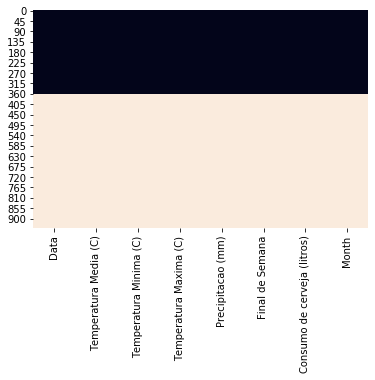

In [15]:
sns.heatmap(df.isnull(),cbar=False)

### INFERENCE: <font color='green'> Information for this dataset was collected for a year. Hence it has data for 365 rows and remaining 576 rows are completely null values. </font>

## Outlier detection

In [16]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Month'],
      dtype='object')

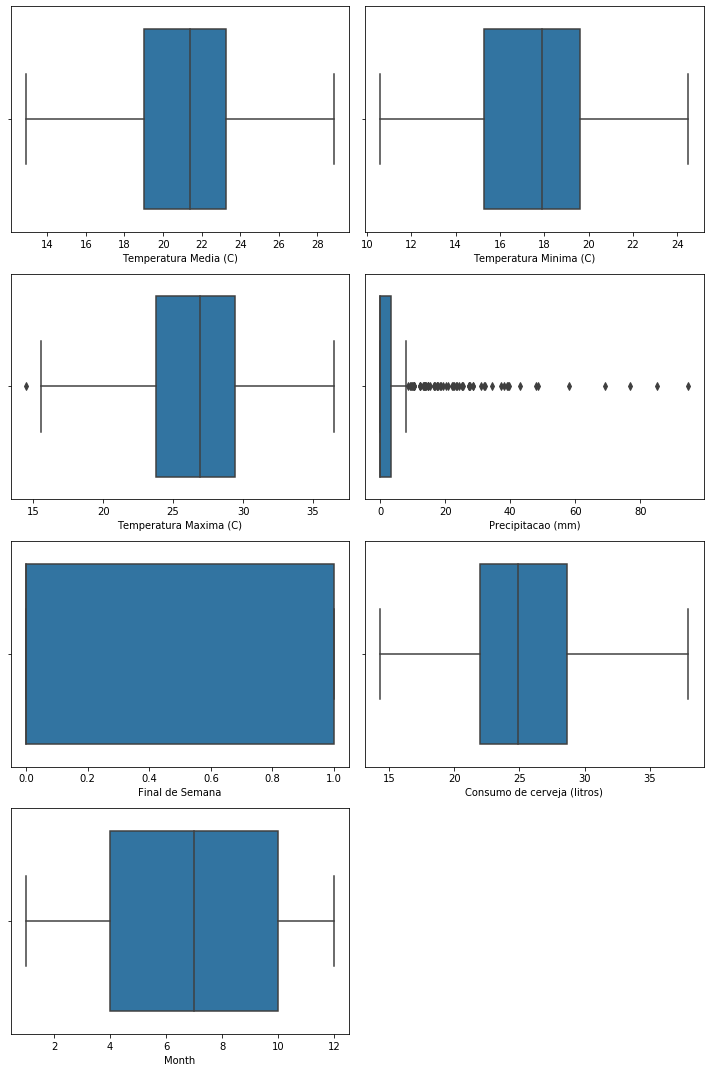

In [17]:
plt.figure(figsize=(10,15))
for i in range(0,len(num_col)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[num_col[i]]) 
    
plt.tight_layout()
plt.show()    

### INFERENCE: <font color='green'> We have outliers in columns 'Precipitacao (mm)' and 'Temperatura Maxima (C)'. </font>

### 2. Data Preparation (15 marks) 

a. Fix the defects found above and do appropriate treatment if any. (5 marks) 

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks) 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks) 

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks) 
 

### a. Fix the defects found above and do appropriate treatment if any. (5 marks)

### Remove null values - Let's drop rows with all features as null values.

In [18]:
# Remove null values - Let's drop rows with all features as null values.

b=df.shape
print('Shape of dataset before removing null values=',b)
df.dropna(how='all',inplace=True)
a=df.shape
print('Shape of dataset after removing null values=',a)
print('Number of rows removed=',b[0]-a[0] )

# Lets check if still null values are present
print('Number of null values still present in the dataset =', df.isnull().sum().sum())

Shape of dataset before removing null values= (941, 8)
Shape of dataset after removing null values= (365, 8)
Number of rows removed= 576
Number of null values still present in the dataset = 0


In [19]:
def find_cap_outlier(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    lb=(Q1 - 1.5*(Q3-Q1))    #LB=Q1-1.5*IQR 
    ub=(Q3 + 1.5*(Q3-Q1))    #UB=Q3+1.5*IQR
    print('Upper bound=',ub)
    print('Lower bound=',lb)
    out_ind=np.where((col > ub) | (col < lb))
    index=list(out_ind[0])
    print('Index of outliers=',index)
    print('Number of index=',len(index))
    outlier_val=[]
    for i in index:
        outlier_val.append(col.loc[i])
    print('Value of outliers in above index=',outlier_val)
    return index,ub,lb;


def cap_outlier(col_nm,UB,LB):
    df[col_nm]=np.where(df[col_nm] > UB, UB,
               np.where(df[col_nm] < LB, LB, df[col_nm]))
    print(col_nm)
    print(UB,LB)

### Handling outliers.

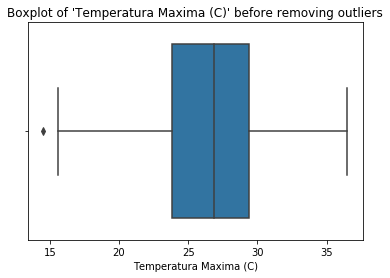

Upper bound= 37.8
Lower bound= 15.400000000000004
Index of outliers= [185]
Number of index= 1
Value of outliers in above index= [14.5]
Temperatura Maxima (C)
37.8 15.400000000000004


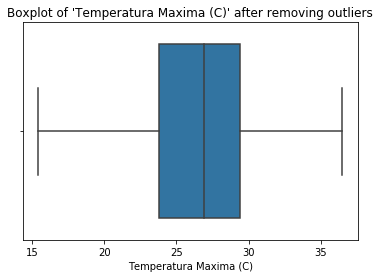

In [20]:
#  Boxplot of 'Temperatura Maxima (C)' before removing outlier.
sns.boxplot(df['Temperatura Maxima (C)'])
plt.title("Boxplot of 'Temperatura Maxima (C)' before removing outliers")
plt.show()

# Finding outlier index
out_ind,Upper_bd,Lower_bd=find_cap_outlier(df['Temperatura Maxima (C)'])

# Capping outlier 
cap_outlier('Temperatura Maxima (C)',Upper_bd,Lower_bd)


# Boxplot of 'Temperatura Maxima (C)' after removing outlier.
sns.boxplot(df['Temperatura Maxima (C)'])
plt.title("Boxplot of 'Temperatura Maxima (C)' after removing outliers")
plt.show()

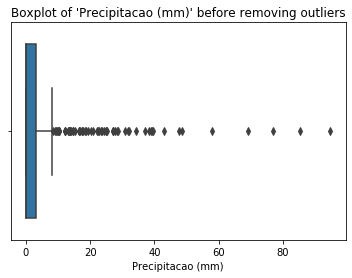

Upper bound= 8.0
Lower bound= -4.800000000000001
Index of outliers= [5, 7, 21, 23, 25, 36, 37, 38, 40, 45, 46, 47, 48, 56, 65, 66, 67, 68, 69, 72, 74, 75, 79, 81, 88, 105, 106, 109, 112, 124, 130, 166, 183, 184, 205, 239, 250, 251, 253, 254, 268, 270, 275, 294, 295, 298, 304, 305, 308, 313, 317, 321, 326, 332, 333, 340, 346, 353, 354, 355, 358, 359, 360, 362]
Number of index= 64
Value of outliers in above index= [12.2, 48.6, 31.0, 13.0, 20.8, 18.4, 16.7, 10.4, 32.2, 17.4, 22.7, 85.3, 13.4, 34.4, 38.2, 69.2, 77.0, 9.7, 9.5, 12.2, 22.4, 24.2, 14.7, 19.2, 18.6, 25.4, 37.2, 20.2, 14.6, 9.9, 22.2, 9.0, 17.8, 15.2, 16.6, 25.0, 23.6, 58.0, 31.8, 27.6, 28.6, 27.2, 25.0, 14.6, 13.4, 28.4, 27.2, 39.6, 39.3, 10.4, 16.4, 14.1, 13.6, 17.4, 23.4, 47.8, 12.2, 8.4, 27.2, 43.0, 39.0, 94.8, 13.6, 10.3]
Precipitacao (mm)
8.0 -4.800000000000001


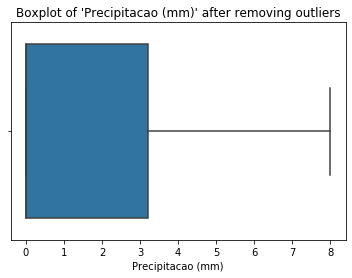

In [21]:
#  Boxplot of 'Precipitacao (mm)' before removing outlier.
sns.boxplot(df['Precipitacao (mm)'])
plt.title("Boxplot of 'Precipitacao (mm)' before removing outliers")
plt.show()

# Finding outlier index
out_ind,Upper_bd,Lower_bd=find_cap_outlier(df['Precipitacao (mm)'])

# Capping outlier 
cap_outlier('Precipitacao (mm)',Upper_bd,Lower_bd)


# Boxplot of 'Precipitacao (mm)' after removing outlier.
sns.boxplot(df['Precipitacao (mm)'])
plt.title("Boxplot of 'Precipitacao (mm)' after removing outliers")
plt.show()

### INFERENCE: <font color='Green'> Outlier was handled by using Capping method - For 'Precipitacao (mm)' column , we had few values lying above upper bound. All values present above UB are replaced by UB value '8' (Q3 + 1.5IQR).</font>  
### <font color='Green'> For 'Temperatura Maxima (C)' column we had only one outlier lying below lower bound. That value was replaced by LB value '15.4' (Q1 - 1.5IQR).</font>  

**b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5m)**

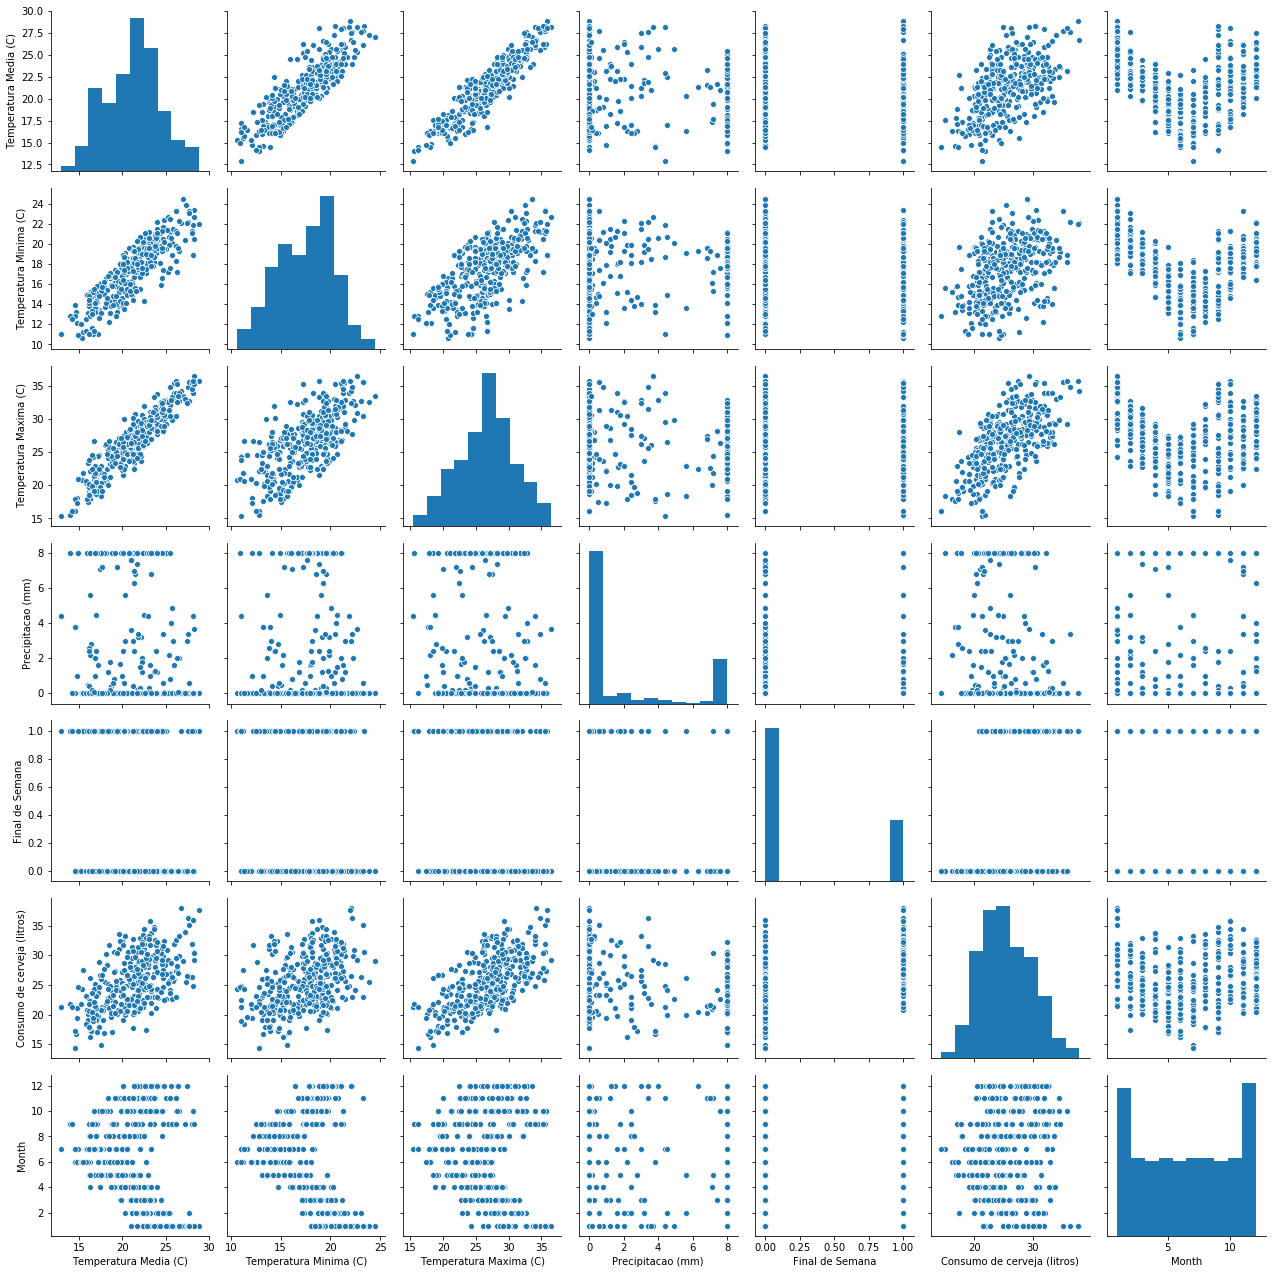

In [22]:
sns.pairplot(df)

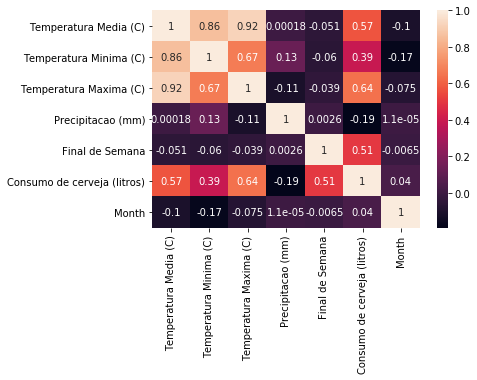

In [23]:
sns.heatmap(df.corr(), annot = True)

In [24]:
df.corr().loc['Consumo de cerveja (litros)']

Temperatura Media (C)          0.574615
Temperatura Minima (C)         0.392509
Temperatura Maxima (C)         0.643133
Precipitacao (mm)             -0.191539
Final de Semana                0.505981
Consumo de cerveja (litros)    1.000000
Month                          0.039908
Name: Consumo de cerveja (litros), dtype: float64

### INFERENCE: <font color='Green'> Columns 'Precipitation'(-0.19) and 'Month'(0.03) has very low correlation with target variable 'Consumo de cerveja (litros)'. Remaining columns seem to have fairly moderate correlation with the target variable. </font>

**c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2m)**

### INFERENCE: <font color='red'> Since column 'Precipitation' has least correlation (-0.19) with the target variable 'Consumo de cerveja (litros)', we can drop this column. 
    
### <font color='red'> Columns - 'Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)' seem to have nearly equal correlation and there may be scope for multi-collinearity. </font>

**d.Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3m)**

In [25]:
# Output is to predict the 'Consumo de cerveja (litros)' - how much litres were consumed.
out=df['Consumo de cerveja (litros)']
out1=out.copy()

# Input is all the columns except 'Consumo de cerveja (litros)' and 'Data'
inp=df.drop(columns=['Consumo de cerveja (litros)','Data'])


xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=40)

print("Shape of input data:", inp.shape)
print("xtrain=",xtrain.shape,"&","xtest=",xtest.shape)

print("Shape of output data:",out.shape)
print("ytrain=",ytrain.shape,"&","ytest=",ytest.shape)

Shape of input data: (365, 6)
xtrain= (255, 6) & xtest= (110, 6)
Shape of output data: (365,)
ytrain= (255,) & ytest= (110,)


In [26]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.613973,1.995616,0.284932,25.401367,6.526027
std,3.180108,2.826185,4.310681,3.147410,0.452001,4.399143,3.452584
min,12.900000,10.600000,15.400000,0.000000,0.000000,14.343000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000
max,28.860000,24.500000,36.500000,8.000000,1.000000,37.937000,12.000000


In [27]:
xtrain.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Month
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,21.089961,17.394902,26.349020,2.086667,0.317647,6.666667
std,3.031314,2.693667,4.197411,3.230828,0.466477,3.408342
min,12.900000,10.900000,15.400000,0.000000,0.000000,1.000000
25%,19.070000,15.250000,23.650000,0.000000,0.000000,4.000000
50%,21.260000,17.900000,26.500000,0.000000,0.000000,7.000000
75%,22.860000,19.450000,29.100000,3.500000,1.000000,10.000000
max,28.860000,24.500000,35.800000,8.000000,1.000000,12.000000


In [28]:
xtest.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Month
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,21.542545,17.615455,27.228182,1.784545,0.209091,6.200000
std,3.495017,3.119433,4.522525,2.948369,0.408521,3.547321
min,14.540000,10.600000,17.400000,0.000000,0.000000,1.000000
25%,18.920000,15.300000,24.325000,0.000000,0.000000,3.000000
50%,21.760000,18.000000,27.550000,0.000000,0.000000,6.000000
75%,23.995000,19.875000,30.650000,2.950000,0.000000,9.000000
max,28.300000,23.900000,36.500000,8.000000,1.000000,12.000000


### INFERENCE: <font color='Green'> From the above statistical summary we can infer that column 'Precipitacao (mm)' has slight difference in statistical values but for rest all columns there is no significant difference  between xtrain and xtest values.</font>

In [29]:
ytrain.describe()

count   255.000000
mean     25.406663
std       4.464104
min      14.343000
25%      21.825500
50%      24.925000
75%      28.533000
max      37.690000
Name: Consumo de cerveja (litros), dtype: float64

In [30]:
ytest.describe()

count   110.000000
mean     25.389091
std       4.264748
min      16.228000
25%      22.631000
50%      24.755000
75%      28.898250
max      37.937000
Name: Consumo de cerveja (litros), dtype: float64

### INFERENCE: <font color='Green'> From the above statistical summary we can infer that there is no significant difference  between ytrain and ytest values.</font>

### 3. Model Building ( 10 marks) 

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (7 marks) 

b. Check for multi-collinearity and treat the same. (3 marks) 

**a. Fit a base model & observe overall R-Squared, RMSE & MAPE values of the model. Please comment on whether it is good or not. (7m)**

In [31]:
# Applying Linear Regression as Base Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ypred= lr.fit(xtrain, ytrain).predict(xtest)

In [32]:
# Checking Model Metrics
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(ytest, ypred))
print("RMSE(Root mean square error): ", np.sqrt(mean_squared_error(ytest, ypred)))
print("MAPE(Mean absolute percentage error):", np.mean(np.abs((ytest - ypred)/ytest))*100) 

R2 Score:  0.7170994310124719
RMSE(Root mean square error):  2.258017092883006
MAPE(Mean absolute percentage error): 7.447537111884736


In [33]:
inpc=sm.add_constant(inp)
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.720
Model:                                     OLS   Adj. R-squared:                  0.715
Method:                          Least Squares   F-statistic:                     153.5
Date:                         Fri, 20 Jan 2023   Prob (F-statistic):           8.81e-96
Time:                                 23:40:37   Log-Likelihood:                -825.75
No. Observations:                          365   AIC:                             1666.
Df Residuals:                              358   BIC:                             1693.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.3679      0.921      5.829      0.000       3.557       7.179
Temperatura Media (C)     -0.0586      0.190     -0.309      0.758      -0.432       0.315
Temperatura Minima (C)     0.0737      0.113      0.649      0.517      -0.150       0.297
Temperatura Maxima (C)     0.6785      0.097      7.024      0.000       0.489       0.869
Precipitacao (mm)         -0.1772      0.041     -4.318      0.000      -0.258      -0.097
Final de Semana            5.1954      0.273     19.053      0.000       4.659       5.732
Month                      0.1236      0.036      3.392      0.001       0.052       0.195
==============================================================================
Omnibus:                        1.501   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.378
Skew:                           0.007   Prob(JB):                        0.502
Kurtosis:                       2.699   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INFERENCE: <font color='Green'>From the OLS summary, we can say that R2 value is nearly equal to 0.72, which means for any change in input/independent variables, there will be nearly 72 % change in output/target variable.</font>

### <font color='Green'> We can see that the RMSE value is 2.25 which is an acceptable value.</font>
 
### <font color='Green'> We can see that the MAPE value is 7.44%.</font>

**b. Check for multi-collinearity and treat the same. (3 marks)**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
vif['features']=inp.columns
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
0,Temperatura Media (C),1102.706708
2,Temperatura Maxima (C),441.805042
1,Temperatura Minima (C),255.752380
5,Month,4.111262
3,Precipitacao (mm),1.542415
4,Final de Semana,1.376907


In [36]:
inp1=inp.drop('Temperatura Media (C)',axis=1)
vif=pd.DataFrame()
vif['features']=inp1.columns
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
1,Temperatura Maxima (C),68.423014
0,Temperatura Minima (C),67.839766
4,Month,4.059917
2,Precipitacao (mm),1.539447
3,Final de Semana,1.376886


In [37]:
inp2=inp1.drop('Temperatura Minima (C)',axis=1)
vif=pd.DataFrame()
vif['features']=inp2.columns
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
0,Temperatura Maxima (C),4.553393
3,Month,4.057519
2,Final de Semana,1.376812
1,Precipitacao (mm),1.366490


### INFERENCE: <font color='Green'> Variance inflation factor(VIF) detects multicollinearity in regression model. In general VIF should be around 1 to 5. If VIF is greater than 5 then there is  high correlation.</font>

### <font color='Green'> When columns 'Temperatura Media (C)' and 'Temperatura Minima (C)' was present VIF value was very high . Hence we dropped those columns and now all columns has VIF value less than 5.</font>

In [38]:
out2=df['Consumo de cerveja (litros)']

# Input is all the columns except Consumo de cerveja (litros)','Data','Temperatura Media (C)','Temperatura Minima (C)
inp2=df.drop(columns=['Consumo de cerveja (litros)','Data','Temperatura Media (C)','Temperatura Minima (C)'])


xtrain1,xtest1,ytrain1,ytest1=train_test_split(inp2,out2,test_size=0.3,random_state=40)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ypred1= lr.fit(xtrain1, ytrain1).predict(xtest1)

In [40]:
# Checking Model Metrics
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(ytest1, ypred1))
print("RMSE(Root mean square error):", np.sqrt(mean_squared_error(ytest1, ypred1)))
print("RMSE):", np.sqrt(mean_squared_error(ypred1,ytest1)))
print("MAPE(Mean absolute percentage error):", np.mean(np.abs((ytest1 - ypred1)/ytest1))*100) 

R2 Score:  0.7213120653574728
RMSE(Root mean square error): 2.241142122028445
RMSE): 2.241142122028445
MAPE(Mean absolute percentage error): 7.37556284599699


In [41]:
inpc=sm.add_constant(inp2)
mod=sm.OLS(out2,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.720
Model:                                     OLS   Adj. R-squared:                  0.717
Method:                          Least Squares   F-statistic:                     231.0
Date:                         Fri, 20 Jan 2023   Prob (F-statistic):           5.14e-98
Time:                                 23:40:38   Log-Likelihood:                -826.06
No. Observations:                          365   AIC:                             1662.
Df Residuals:                              360   BIC:                             1682.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6238      0.844      6.663      0.000       3.964       7.284
Temperatura Maxima (C)     0.6714      0.029     23.347      0.000       0.615       0.728
Precipitacao (mm)         -0.1695      0.039     -4.319      0.000      -0.247      -0.092
Final de Semana            5.1858      0.272     19.077      0.000       4.651       5.720
Month                      0.1181      0.036      3.311      0.001       0.048       0.188
==============================================================================
Omnibus:                        1.290   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.231
Skew:                           0.000   Prob(JB):                        0.540
Kurtosis:                       2.715   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INFERENCE: <font color='Green'> After handling multi-collinearity, the model still has an R2 value of 0.72 which says it is a model with moderate prediction. That means for any change in input/independent variables, there will be nearly 72 % change in output/target variable.</font>

###  <font color='Green'> Adjusted R2 value has also slightly improved after handling multi-collinearity i.e., from 0.715 to 0.717 (but still its negligible). </font>